In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Red = pd.read_csv('/content/winequality-red.csv', sep=';')
White = pd.read_csv('/content/winequality-white.csv', sep=';')

## **Merging the datasets**

In [ ]:
Red['type'] = 'red'
White['type'] = 'white'
wine = pd.concat([White, Red])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## **Data Preprocessing**

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


***There are no null values***

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

***There is no missing value***

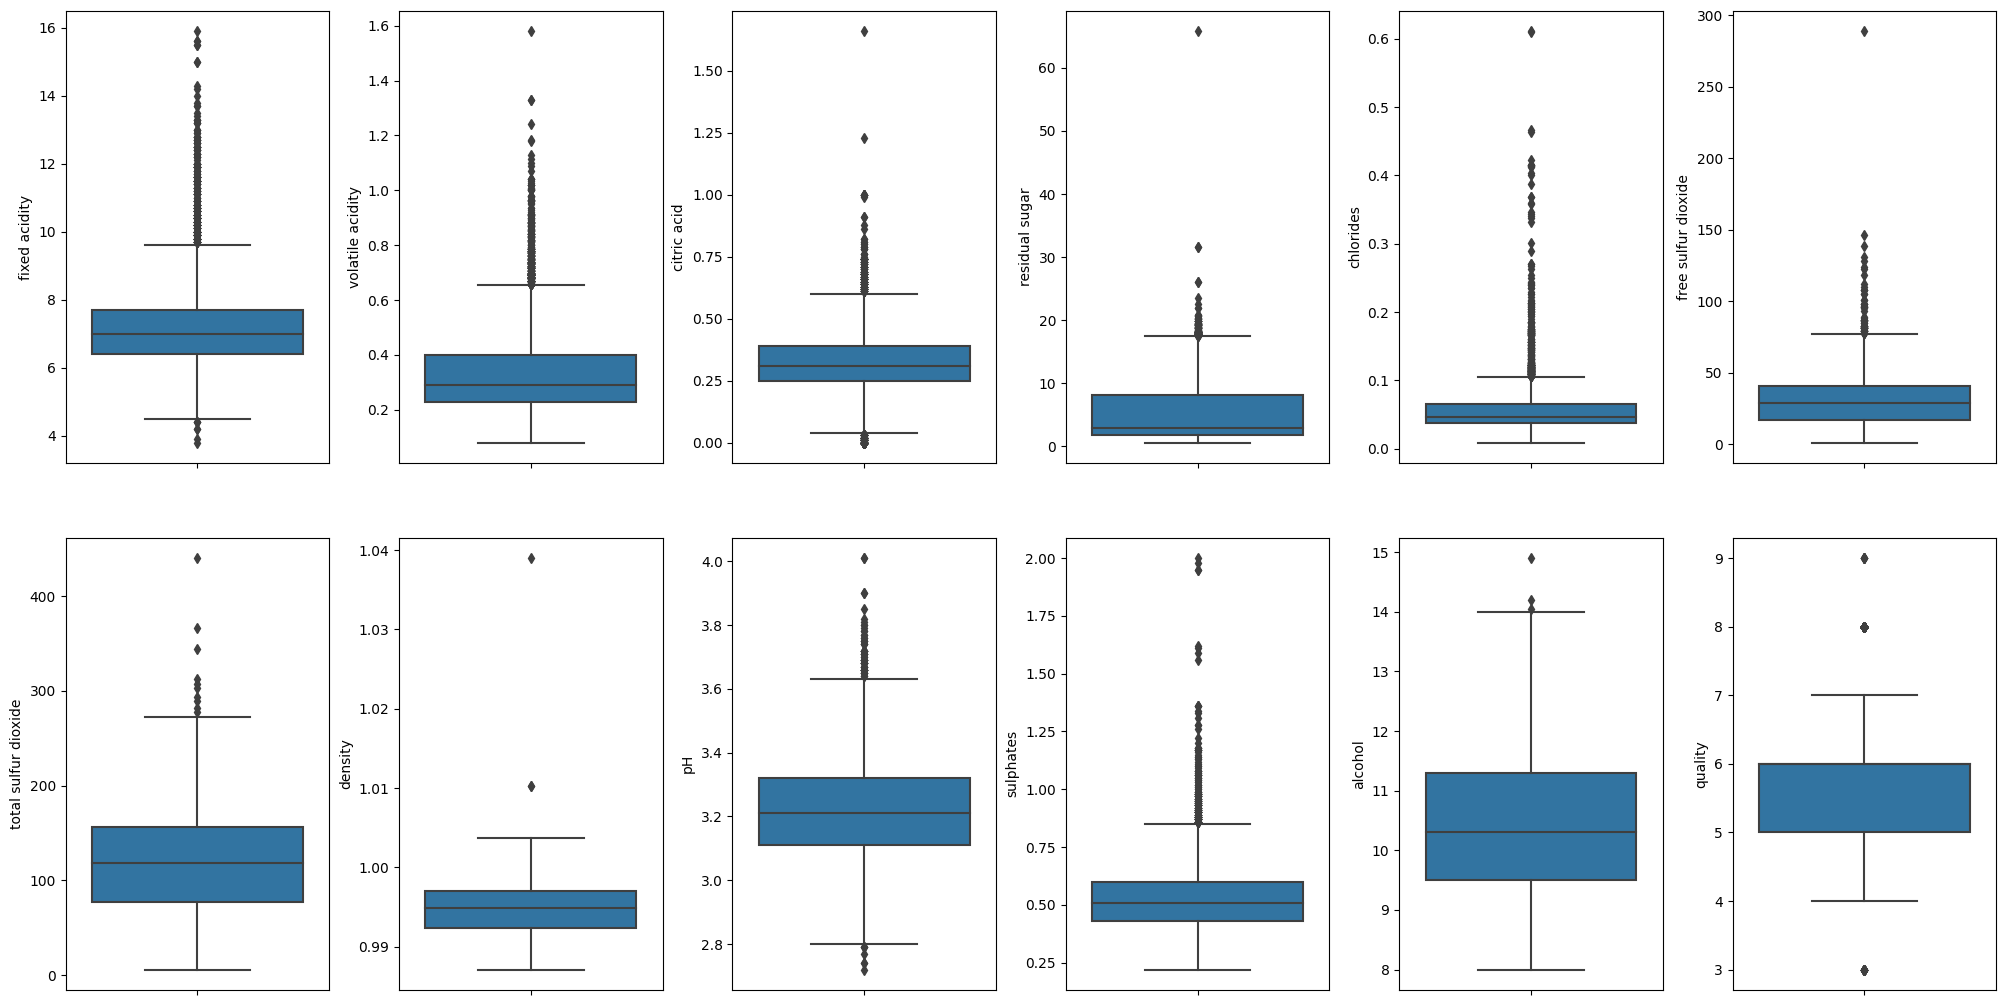

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
    if col != 'type':
        sns.boxplot(y=col, data=wine, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

***Box Plot showing Outliers***

In [ ]:
from scipy import stats
numerical_columns = wine.select_dtypes(include=[int, float])
columns_to_remove_outliers = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density']
z = np.abs(stats.zscore(numerical_columns[columns_to_remove_outliers]))
threshold = 3
outlier_indices = np.where(z > threshold)
mask = np.isin(np.arange(len(numerical_columns)), outlier_indices[0])
wines = wine[~mask]
print('Dataset size before removing outliers: ', wine.shape)
print('Dataset size after removing outliers: ', wines.shape)


Dataset size before removing outliers:  (6497, 13)
Dataset size after removing outliers:  (6306, 13)


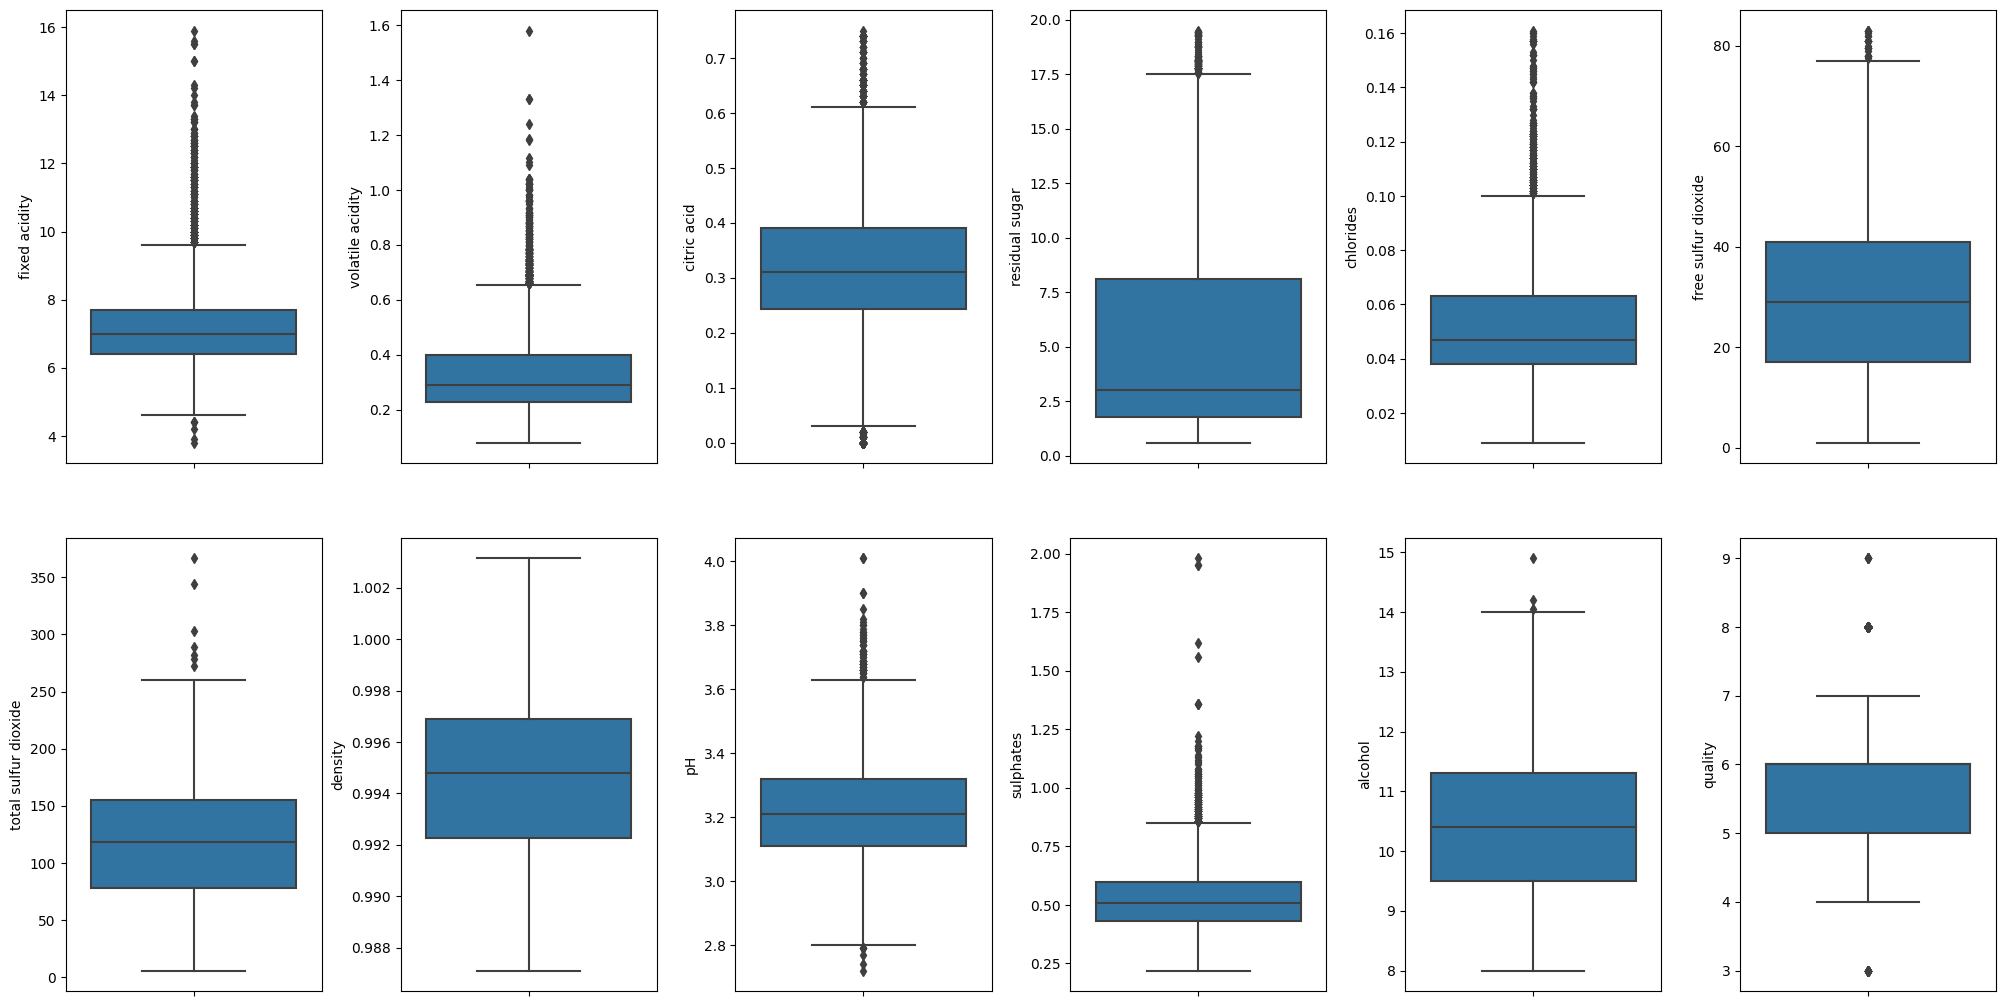

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in wines.items():
    if col != 'type':
        sns.boxplot(y=col, data=wines, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

***Box Plot after removing Outliers***

In [ ]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000,6306.000000
mean,7.209190,0.338191,0.315082,5.377545,0.052860,30.040755,115.261418,0.994636,3.220858,0.528939,10.511724,5.828576
std,1.291373,0.163706,0.139139,4.591189,0.021952,16.491576,55.857127,0.002921,0.160453,0.142555,1.191598,0.871770
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.242500,1.800000,0.038000,17.000000,78.000000,0.992260,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.063000,41.000000,155.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,0.750000,19.500000,0.161000,83.000000,366.500000,1.003150,4.010000,1.980000,14.900000,9.000000


***Statistical measures***

## **Data Visualization**

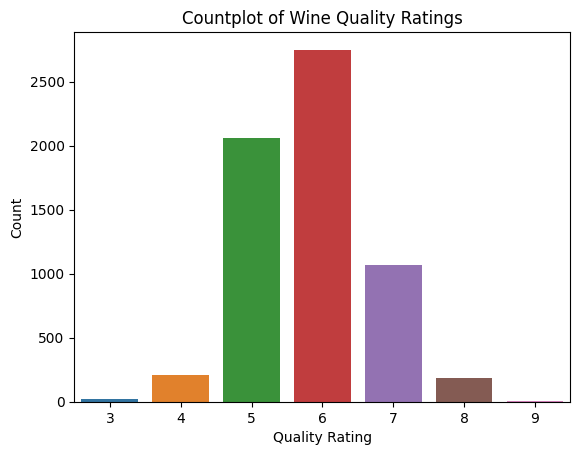

In [ ]:
sns.countplot(data=wines, x='quality')
plt.title('Countplot of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()

***Output variable before balancing***

## **Handling Imbalanced Data**

In [ ]:
X = wines.drop(columns=['type', 'quality'])
y = wines['quality']

In [ ]:
y.value_counts()

6    2750
5    2057
7    1072
4     210
8     189
3      23
9       5
Name: quality, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X_res, y_res = oversample.fit_resample(X, y)

In [ ]:
y_res.value_counts()

6    2750
5    2750
7    2750
8    2750
4    2750
3    2750
9    2750
Name: quality, dtype: int64

<Axes: >

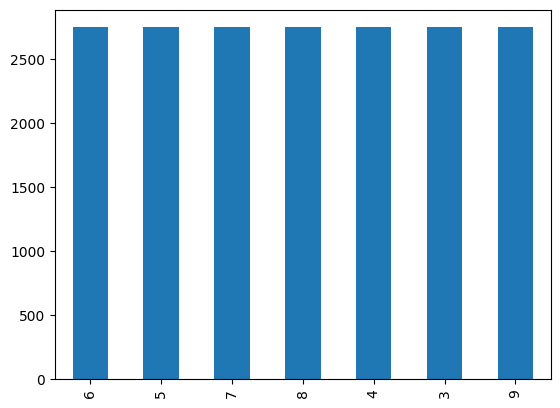

In [ ]:
y_res.value_counts().plot.bar()

***Output variable after balancing***

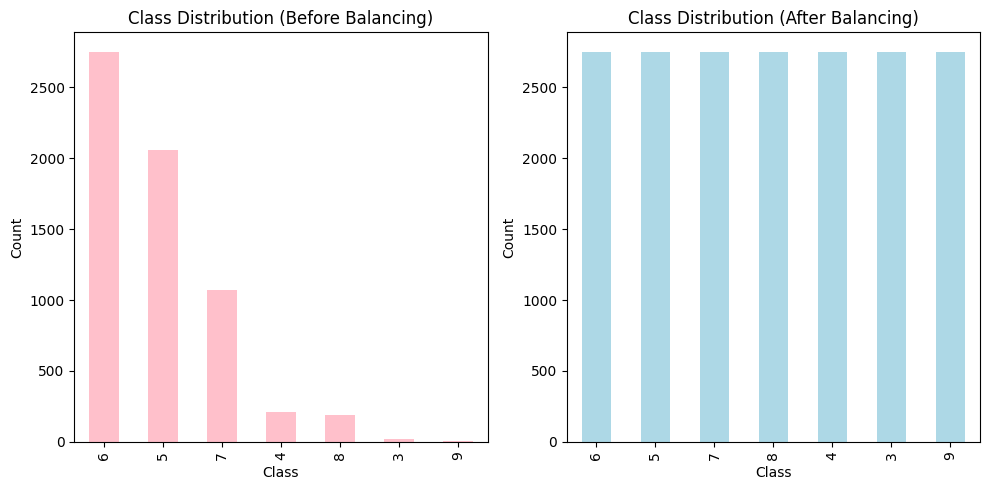

In [ ]:
class_counts_before = y.value_counts()

# Count the occurrences of each class after oversampling
y_train_oversampled_counts = pd.Series(y_res).value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
class_counts_before.plot(kind='bar', color='pink')
plt.title('Class Distribution (Before Balancing)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
y_train_oversampled_counts.plot(kind='bar', color='lightblue')
plt.title('Class Distribution (After Balancing)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()